In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [93]:
df = pd.read_csv("files/cleaned_titanic.csv")
df.head()

,survived,pclass,sex,age,sibSp,parch,fare,embarked,family_size,title
0,0,3,1,-0.592240,1,0,-0.312011,2,1.0,2
1,1,1,0,0.638529,1,0,2.461242,0,1.0,3
2,1,3,0,-0.284548,0,0,-0.282777,2,0.0,1
3,1,1,0,0.407760,1,0,1.673732,2,1.0,3
4,0,3,1,0.407760,0,0,-0.277363,2,0.0,2


In [94]:
x = df.drop("survived" , axis=1 )
y = df["survived"]
x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size=.2) 

In [95]:


param_grid = {
    'n_estimators': [200],  
    'max_depth': [10],
    'min_samples_split': [2, ],  
    'min_samples_leaf': [2,], 
}




rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5)

grid_search.fit(x, y)

best_rf = grid_search.best_estimator_

print("Best Parameters: ", grid_search.best_params_)



Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [96]:
rf = RandomForestClassifier(max_depth = 10 , min_samples_leaf = 2,min_samples_split=2,n_estimators=200)
rf.fit(x_train,y_train)

y_pred = best_rf.predict(x)

# Results
print("Accuracy:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))


Accuracy: 0.9007633587786259
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       461
           1       0.94      0.82      0.87       325

    accuracy                           0.90       786
   macro avg       0.91      0.89      0.90       786
weighted avg       0.90      0.90      0.90       786



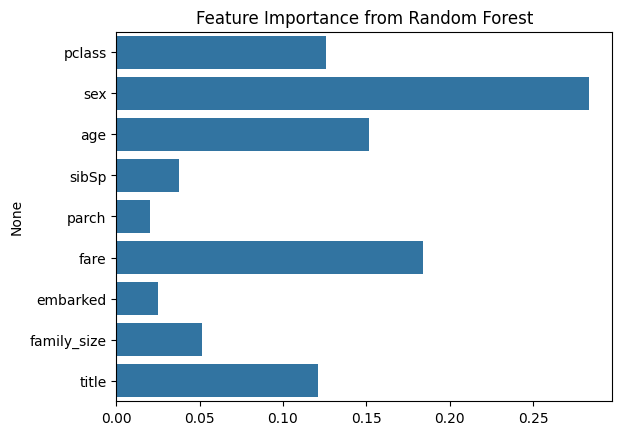

In [97]:

feature_importances = best_rf.feature_importances_
features = x.columns

sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance from Random Forest")
plt.show()


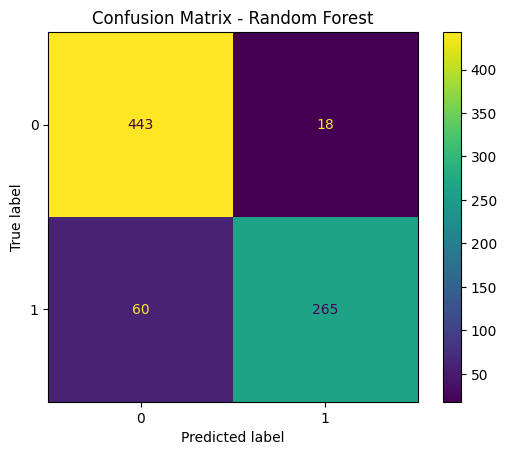

In [ ]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [112]:
y_probs = rf.predict_proba(x)[:, 1]

auc_score = roc_auc_score(y, y_probs)*100
auc_score

np.float64(94.66577673952945)

In [117]:
fpr, tpr, thresholds = roc_curve(y, y_probs)


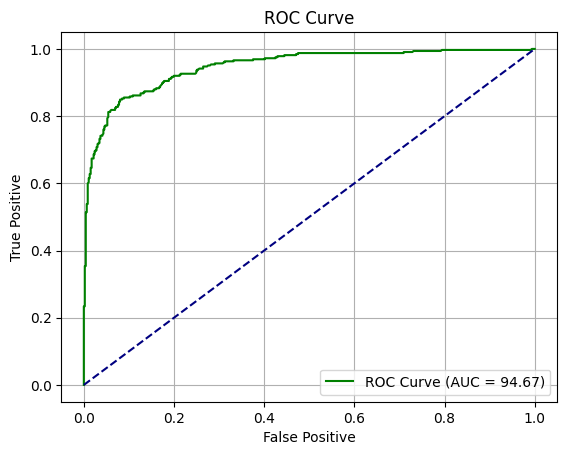

In [121]:

plt.plot(fpr, tpr, color='g', label=f'ROC Curve (AUC = {auc_score:.2f})')

# Add the random baseline (diagonal line)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [124]:
import joblib

joblib.dump(rf, "titanic_rf_model.pkl")


['titanic_rf_model.pkl']